<a href="https://colab.research.google.com/github/Maakal/bitstarter/blob/master/LSTM_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#get the stock quote
df = web.DataReader('MSFT', data_source='yahoo', start='2005-01-01', end='2022-12-17')
#show the data
#df
df.shape
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.xlabel('Close Price USD', fontsize=18)
plt.show()


In [101]:
#Create new dataframe with only Close
data = df.filter(['Close'])
#convert the dataframe to numpy array
dataset = data.values
#get the number of rows to train the model
training_data_len = math.ceil(len(dataset)*0.7)
training_data_len


2883

In [102]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [103]:
#Create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(21,len(train_data)):
  x_train.append(train_data[i-21:i, 0])
  y_train.append(train_data[i, 0])

#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#reshape the data
x_train.shape

(2862, 21, 1)

In [104]:
#bild the LSTM model
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(360, return_sequences=False))
model.add(Dense(60))
model.add(Dense(1))




In [105]:
#compile the model
model.compile(optimizer='adam', loss ='mean_squared_error')


In [106]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2862/2862 [==============================] - 108s 37ms/step - loss: 1.3873e-04


In [107]:
#Create the testing dataset
#create a new array contaning scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 21 :, ]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(21, len(test_data)):
  x_test.append(test_data[i-21:i,0])

#convert the data to a numpy array
x_test = np.array(x_test)



In [108]:
#reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))




In [109]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [110]:
#evaluate model
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


0.4434115822981244

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


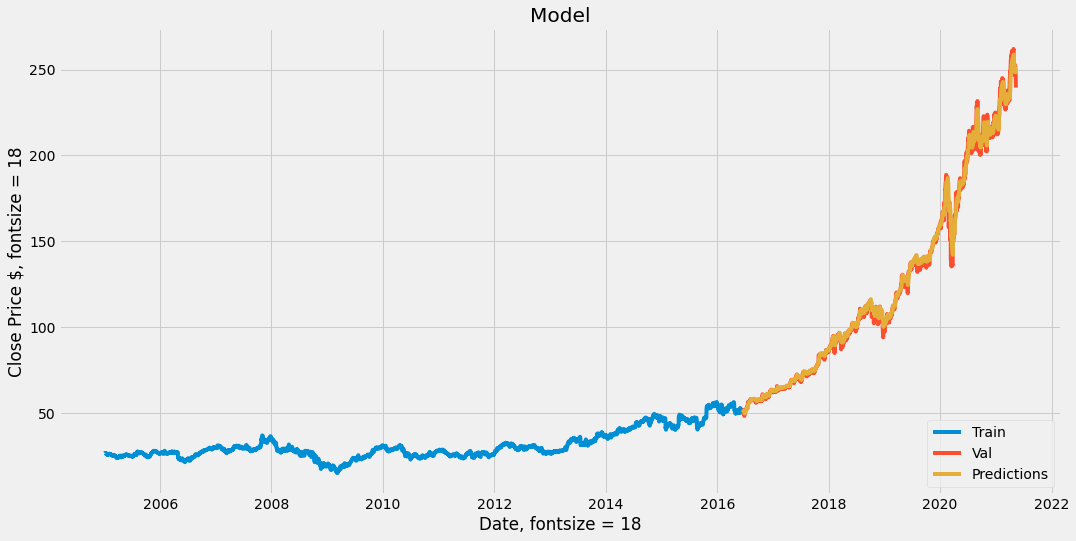

In [111]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualise model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date, fontsize = 18')
plt.ylabel('Close Price $, fontsize = 18')

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [112]:
#show valid and predicted prices
valid

,Close,Predictions
Date,,
2016-06-16,50.389999,50.562389
2016-06-17,50.130001,50.664440
2016-06-20,50.070000,50.653877
2016-06-21,51.189999,50.596313
2016-06-22,50.990002,50.976215
...,...,...
2021-05-06,249.729996,248.502182
2021-05-07,252.460007,248.837784
2021-05-10,247.179993,250.167633
